In [1]:
import numpy as np

def f(x):
    return np.sin(np.sqrt(100*x))**2    # função integrada


def simpson(a,b,N):
    h = (b-a)/N
    odds = 0
    evens = 0
    for i in range(1,N,2):
        odds+= f(a+i*h)
    for i in range(2,N,2):
        evens+=f(a+i*h)
    return (1/3)*h*(f(a)+f(b)+4*odds+2*evens)
M=7
N=2                                     # parâmetros 
a=0
b = 1
h = (b-a)/N
grelha = np.zeros((M,M))
sum = 0
for i in range(1,N):                       # cálculo da primeira entrada da matriz,
    sum += f(a+i*h)                        # usando a regra do trapézio 
grelha[0][0] = h*(0.5*f(a)+0.5*f(b)+ sum)

def recurso(matriz,i,j,N0,a,b):            # função recursiva que calcula todas as entradas
    if j == 0:                             # de uma linha usando como argumento os indices de uma entrada, 
        N = N0*2**i                        # calculando todas as entradas para trás dessa
        h = (b-a)/N
        sum = 0
        for k in range(1,N,2):
            sum += f(a + k*h)
        matriz[i][j] = 0.5*matriz[i-1][j] + h*sum
    else:
        recurso(matriz,i,j-1,N0,a,b)
        matriz[i][j] = matriz[i][j-1] + (1/(4**(j)-1))*(matriz[i][j-1]-matriz[i-1][j-1])
        

def romberg(matriz,N0,a,b,erro):                     # função que implementa recurso() e pára baseada num erro
    recurso(matriz,1,1,N0,a,b)    
    e = (1/(4**(1)-1))*(matriz[1][0]-matriz[0][0])
    i = 0
    while np.abs(e-erro)>erro:
        i += 1
        matriz[i][i] = matriz[i][i-1] + e
        recurso(matriz,i+1,i,N0,a,b)
        h = (b-a)/(N0*2**i)
        e = (1/(4**(i+1)-1))*(matriz[i+1][i]-matriz[i][i])
    return matriz
print(romberg(grelha,N,a,b,10**(-6)))

[[ 0.32523191  0.          0.          0.          0.          0.          0.        ]
 [ 0.51228285  0.57463317  0.          0.          0.          0.          0.        ]
 [ 0.40299745  0.36656898  0.35269804  0.          0.          0.          0.        ]
 [ 0.43010337  0.43913868  0.44397666  0.44542552  0.          0.          0.        ]
 [ 0.44841467  0.45451843  0.45554375  0.45572735  0.45576775  0.          0.        ]
 [ 0.45391293  0.45574569  0.4558275   0.45583201  0.45583242  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.        ]]


In [2]:
grelha = np.zeros((M,M))
grelha[0][0] = simpson(a,b,N)



def recurso1(matriz,i,j,N0,a,b):         
    if j == 0:                           
        N = N0*2**i                      
        h = (b-a)/N
        sum = 0
        for k in range(1,N,2):
            sum += f(a + k*h)
        matriz[i][j] = 0.5*matriz[i-1][j] + h*sum
    else:
        recurso(matriz,i,j-1,N0,a,b)
        matriz[i][j] = matriz[i][j-1] + (1/(4**(j)-1))*(matriz[i][j-1]-matriz[i-1][j-1])
        
def romberg1(matriz,N0,a,b,erro):                     
    recurso(matriz,1,1,N0,a,b)    
    e = (1/(4**(1)-1))*(matriz[1][0]-matriz[0][0])
    i = 0
    while np.abs(e-erro)>erro:
        i += 1
        matriz[i][i] = matriz[i][i-1] + e
        recurso(matriz,i+1,i,N0,a,b)
        h = (b-a)/(N0*2**i)
        e = (1/(4**(i+1)-1))*(matriz[i+1][i]-matriz[i][i])
    return matriz
print(romberg1(grelha,N,a,b,10**(-6)))

IndexError: index 7 is out of bounds for axis 0 with size 7

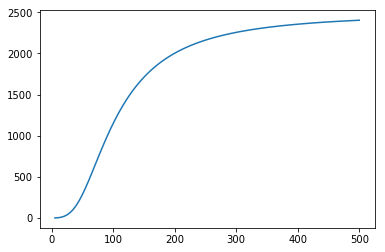

In [15]:
import numpy as np
import pylab as p
def lindo(y):
    N = 50
    x,w = np.polynomial.legendre.leggauss(N)
    x =  0.5*y*x + 0.5*y
    w = 0.5*y*w
    return x,w

def f(x):
    return x**4*np.exp(x)/(np.exp(x)-1)**2

V= 1000*10**(-6)
rho = 6.022*10**(28)
k =1.38*10**(-23)

T = np.linspace(5,500,100)
I = np.zeros(len(T))
C = 9*V*k*rho*(T/428)**3

for i in range(len(T)):
    x,w = lindo(428/T[i])
    I[i] = np.sum(w*f(x))

p.plot(T,C*I)
p.show()


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply


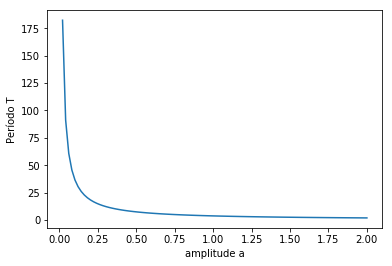

In [23]:
def lindo(y):
    N = 50
    x,w = np.polynomial.legendre.leggauss(N)
    x =  0.5*y*x + 0.5*y
    w = 0.5*y*w
    return x,w

def f(x,a):
    return 1/np.sqrt(a**4-x**4)



Tit = np.linspace(0,2,100)
I = np.zeros(len(T))
C = np.sqrt(8)

for i in range(len(Tit)):
    x,w = lindo(Tit[i])           # <3 <3 <3 
    I[i] = np.sum(w*f(x,Tit[i]))

p.plot(Tit,C*I)
p.xlabel('amplitude a')
p.ylabel('Período T')
p.show()

In [33]:
def titi(x):
    return 'o titi come ' + x
titi('gosma')

'o titi come gosma'

In [34]:
def zeca():
    return 'afonso'
zeca()

'afonso'

In [35]:
def titona():
    return 'olá titona'
titona()

'olá titona'

In [39]:
def dragonball(g,t):
    return str(g) + ', ' + str(t) + ', ' + 'dragonball ' +str(g)+str(t) + ' guerreiro'

In [40]:
G = 'G'
T = 'T'
dragonball(G,T)

'G, T, dragonball GT guerreiro'

In [3]:
import numpy as np

def gauss(matriz):
    for i in range(len(matriz)):
        matriz[i]=matriz[i]/matriz[i][i]
        for j in range(i + 1,len(matriz)):
            matriz[j] = matriz[j] - matriz[i]*matriz[j][i]
    sol = np.zeros(len(matriz))
    for i in range(1,len(matriz)+1):
            sol[-i] = matriz[-i][-1] - np.dot(sol,matriz[-i][:-1])
    return sol
matriz = np.array([[4,-1,-1,-1,5],[-1,0,3,-1,5],[-1,-1,0,4,0],[-1,3,0,-1,0]],float)

In [42]:

matriz = np.array([[4,-1,-1,-1,5],[-1,0,3,-1,5],[-1,-1,-1,4,0],[-1,3,0,-1,0]],float)
gauss(matriz)

array([ 3.        ,  1.66666667,  3.33333333,  2.        ])

In [2]:
import numpy as np
def pivot(matriz,i):
    a = 0
    b = 0
    c = np.zeros(len(matriz[0]))
    for j in range(i,len(matriz)):
        if np.abs(matriz[j][i]) > np.abs(a):
            a,b = matriz[j][i],j
    c[:] = matriz[i][:]
    matriz[i][:] = matriz[b][:]
    matriz[b][:] = c[:]
    return matriz

In [16]:
matriz = np.array([[4,-1,-1,-1,5],[-1,0,3,-1,5],[-1,-1,0,4,0],[-1,3,0,-1,0]],float)


In [121]:
def gauss(matriz):
    for i in range(len(matriz)):
        matriz[i]=matriz[i]/matriz[i][i]
        for j in range(i + 1,len(matriz)):
            matriz[j] = matriz[j] - matriz[i]*matriz[j][i]
    print(matriz)
    sol = np.zeros(len(matriz))
    for i in range(1,len(matriz)+1):
            sol[-i] = matriz[-i][-1] - np.dot(sol,matriz[-i][:-1])
            
    return sol
matriz = np.array([[-2,1,0,0,0],[1,-2,1,0,0],[0,1,-2,1,0],[0,0,1,-2,-1]],float)
gauss(matriz)

[[ 1.         -0.5        -0.         -0.         -0.        ]
 [-0.          1.         -0.66666667 -0.         -0.        ]
 [-0.         -0.          1.         -0.75       -0.        ]
 [-0.         -0.         -0.          1.          0.8       ]]


array([ 0.2,  0.4,  0.6,  0.8])

In [122]:
def reduc(matriz):
    for i in range(len(matriz)):
        pivot(matriz,i)
        matriz[i]=matriz[i]/matriz[i][i]
        for j in range(i + 1,len(matriz)):
            matriz[j] = matriz[j] - matriz[i]*matriz[j][i]
    return matriz
gauss1(matriz)

NameError: name 'gauss1' is not defined

# Decomposição LU

In [6]:
def pivot(matriz,i):
    a = 0
    b = 0
    c = np.zeros(len(matriz[0]))
    for j in range(i,len(matriz)):
        if np.abs(matriz[j][i]) > np.abs(a):
            a,b = matriz[j][i],j
    c[:] = matriz[i][:]
    matriz[i][:] = matriz[b][:]
    matriz[b][:] = c[:]
    return matriz

def reduc(matriz):
    for i in range(len(matriz)):
        matriz[i]=matriz[i]/matriz[i][i]
        for j in range(i + 1,len(matriz)):
            matriz[j] = matriz[j] - matriz[i]*matriz[j][i]
    return matriz
matriz = np.array([[4,2,-1,-7],[-1,0,5,-1],[-2,-1,-9,13],[8,3,0,-1]],float)
matriz

array([[  4.,   2.,  -1.,  -7.],
       [ -1.,   0.,   5.,  -1.],
       [ -2.,  -1.,  -9.,  13.],
       [  8.,   3.,   0.,  -1.]])

In [7]:
matriz = np.array([[-1,-1,2,1],[-2,1,1,-2],[1,2,-2,1],[-3,2,4,-1]],float)
A = np.copy(matriz)
U = reduc(matriz)
A[:,1][:2]

array([-1.,  1.])

In [8]:
import numpy as np
U = reduc(matriz)
def lower(matriz,U):
    N = len(U)
    L = np.zeros((N,N))
    for i in range(len(matriz)):
        for j in range(i+1):
            L[i][j] = matriz[i][j] - np.dot(U[:,j][:j],L[i][:j])
    return L
L = lower(A,U)

In [9]:
print('MATRIZ L: \n',L,'\n')
print('MATRIZ U: \n',U,'\n')
print(np.dot(L,U)-A,'\n')


MATRIZ L: 
 [[-1.          0.          0.          0.        ]
 [-2.          3.          0.          0.        ]
 [ 1.          1.          1.          0.        ]
 [-3.          5.          3.         -7.33333333]] 

MATRIZ U: 
 [[ 1.          1.         -2.         -1.        ]
 [ 0.          1.         -1.         -1.33333333]
 [ 0.          0.          1.          3.33333333]
 [ 0.          0.          0.          1.        ]] 

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -2.22044605e-16]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]] 



In [10]:
import numpy as np

def f(x):
    return np.sin(np.sqrt(100*x))**2    # função integrada


M=7
N=100                                     # parâmetros 
a=0
b = 1
h = (b-a)/N
grelha = np.zeros((M,M))
sum = 0
for i in range(1,N):                       # cálculo da primeira entrada da matriz,
    sum += f(a+i*h)                        # usando a regra do trapézio 
grelha[0][0] = h*(0.5*f(a)+0.5*f(b)+ sum)

def recurso(matriz,i,j,N0,a,b):            # função recursiva que calcula todas as entradas
    if j == 0:                             # de uma linha usando como argumento os indices de uma entrada, 
        N = N0*2**i                        # calculando todas as entradas para trás dessa
        h = (b-a)/N
        sum = 0
        for k in range(1,N,2):
            sum += f(a + k*h)
        matriz[i][j] = 0.5*matriz[i-1][j] + h*sum
    else:
        recurso(matriz,i,j-1,N0,a,b)
        matriz[i][j] = matriz[i][j-1] + (1/(4**(j)-1))*(matriz[i][j-1]-matriz[i-1][j-1])
        

def romberg(matriz,N0,a,b,erro):                     # função que implementa recurso() e pára baseada num erro
    recurso(matriz,1,1,N0,a,b)    
    e = (1/(4**(1)-1))*(matriz[1][0]-matriz[0][0])
    i = 0
    for i in range(1,6):
        matriz[i][i] = matriz[i][i-1] + e
        recurso(matriz,i+1,i,N0,a,b)
        h = (b-a)/(N0*2**i)
        e = (1/(4**(i+1)-1))*(matriz[i+1][i]-matriz[i][i])
    return matriz
print(romberg(grelha,N,a,b,10**(-6)))

[[ 0.45504094  0.          0.          0.          0.          0.          0.        ]
 [ 0.45563394  0.45583161  0.          0.          0.          0.          0.        ]
 [ 0.45578284  0.45583247  0.45583253  0.          0.          0.          0.        ]
 [ 0.45582011  0.45583253  0.45583253  0.45583253  0.          0.          0.        ]
 [ 0.45582943  0.45583253  0.45583253  0.45583253  0.45583253  0.          0.        ]
 [ 0.45583176  0.45583253  0.45583253  0.45583253  0.45583253  0.45583253
   0.        ]
 [ 0.45583234  0.45583253  0.45583253  0.45583253  0.45583253  0.45583253
   0.        ]]
